In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# save_path = '../results_final_Dec22/'
save_path = '../results_final_Jan15/'
signed_score_df = pd.read_csv(save_path + 'granger_hvg_T_signed_score.csv', index_col=0)

In [3]:
signed_score_df

,AL645608.3,AL645608.5,AL645608.1,SAMD11,HES4,ISG15,RNF223,TTLL10,AL162741.1,MXRA8,...,MT-CO1,MT-CO2,MT-ATP8,MT-ATP6,MT-ND3,MT-ND4L,MT-ND5,MT-ND6,AC145212.1,AL354822.1
SAMD11,-0.349207,-1.634978,0.037299,-0.000976,-0.056899,-1.073864,1.515773,-1.348200,2.105863,1.382979,...,-1.098865,-1.579757,0.041632,-1.272410,-0.666154,-1.552113,-2.187881,-0.703952,0.340784,-1.287041
HES4,5.469066,0.283322,6.795210,6.929091,0.000976,1.261528,0.064096,-0.285753,-0.773015,0.271001,...,-0.208841,0.204619,0.850516,0.236467,0.439507,0.217523,-0.128765,2.310407,-2.816715,4.559797
HES5,-0.607876,-1.859940,-0.361854,-0.551318,-2.598147,0.168912,1.988611,2.473235,-0.119091,-4.318493,...,-0.405831,0.000004,2.704849,0.644746,0.835222,2.510698,0.427523,-0.280896,0.000244,-0.301162
ENO1,-0.204434,-1.134578,-0.259215,-0.867337,-1.746574,-3.716814,1.112110,-0.139619,3.939491,-1.875997,...,-1.135585,-0.579640,0.321123,-0.088855,0.205608,0.740610,0.128921,-0.407812,0.390953,-1.403131
CASZ1,0.289665,1.762207,0.271179,0.105973,-0.269326,5.945402,-2.768557,4.196360,-6.745220,0.446644,...,1.047346,1.646237,-0.634864,1.262102,0.680261,1.450748,1.359307,0.222835,-1.543227,0.968978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SOX10,-0.623707,0.506992,-0.650998,-1.701194,-2.275528,1.632295,-1.798548,0.880400,-1.791675,0.187335,...,0.388056,0.715443,-0.413954,0.576995,0.394001,0.794486,0.698763,-0.533566,-0.536332,-0.512903
MAFF,-0.620923,0.008126,-1.029556,-1.202599,-1.323018,-0.612773,-0.033141,0.984667,0.249241,-6.931417,...,0.200242,1.421081,0.436343,1.446301,1.117494,3.176272,3.028134,-0.233006,1.037423,-0.892112
ATF4,0.016405,3.122196,-0.536379,-1.380849,-0.585237,0.569129,-1.948019,1.131798,-1.189775,-4.752941,...,2.256284,4.100238,-0.088023,2.884887,1.754293,3.104053,5.762747,2.056393,-0.556721,0.854390
OLIG1,-0.298758,1.830300,-0.400079,-1.246911,-1.183241,2.725387,-4.163570,2.556437,-5.484630,-0.329319,...,1.116048,1.911473,0.020768,1.632993,1.124926,2.299084,2.142773,0.020789,-0.910092,0.070592


In [4]:
import scanpy as sc


from sklearn.preprocessing import StandardScaler
import seaborn as sns

adata = sc.read_h5ad('../data/rna_figure_ready.h5ad')
gene_names = adata.var_names.to_numpy()

traj = np.load(f"../results_final_Dec22/traj_gene_space_T_extreme.npy", allow_pickle=True)

# sc.pp.highly_variable_genes(adata, n_top_genes=400)
alex_genes = open('../data/hvg.txt').read().splitlines()
alex_tfs = open('../data/hv_tf.txt').read().splitlines()

alex_gene_all = list(set(alex_genes) | set(alex_tfs))
alex_gene_all_mask = np.isin(adata.var_names, alex_gene_all)
traj = traj[:, :, alex_gene_all_mask]
gene_names = adata.var_names[alex_gene_all_mask]

traj_mean = traj.mean(axis=1)
traj_std = traj.std(axis=1)
traj_mean_std = traj_mean.std(axis=0)
zero_std_genes = traj_mean_std == 0
gene_names = np.array(gene_names)[~zero_std_genes]
traj, traj_mean, traj_std, traj_mean_std = traj[..., ~zero_std_genes], traj_mean[..., ~zero_std_genes], traj_std[..., ~zero_std_genes], traj_mean_std[..., ~zero_std_genes]
# traj_mean_normalized = (traj_mean - traj_mean.mean(axis=0)) / traj_mean.std(axis=0)
traj_mean_normalized = (traj_mean - traj_mean.min(axis=0)) / (traj_mean.max(axis=0) - traj_mean.min(axis=0))
trends_df = pd.DataFrame(traj_mean_normalized, columns=gene_names, index=[f't{i}' for i in range(traj_mean_normalized.shape[0])]).T


In [5]:
# Get the indices of top 5 values for each row
top_5_indices = trends_df.apply(lambda x: np.where(x >= sorted(x)[-10])[0].mean(), axis=1)
# Sort the dataframe by mean of top 5 indices
trends_df_sorted = trends_df.iloc[top_5_indices.argsort()]
trends_df_sorted

# Extract valid names for columns and rows
valid_cols = [name for name in trends_df_sorted.index if name in signed_score_df.columns]
valid_rows = [name for name in trends_df_sorted.index if name in signed_score_df.index]

# Reorder the DataFrame
df_reordered = signed_score_df.loc[valid_rows, valid_cols]

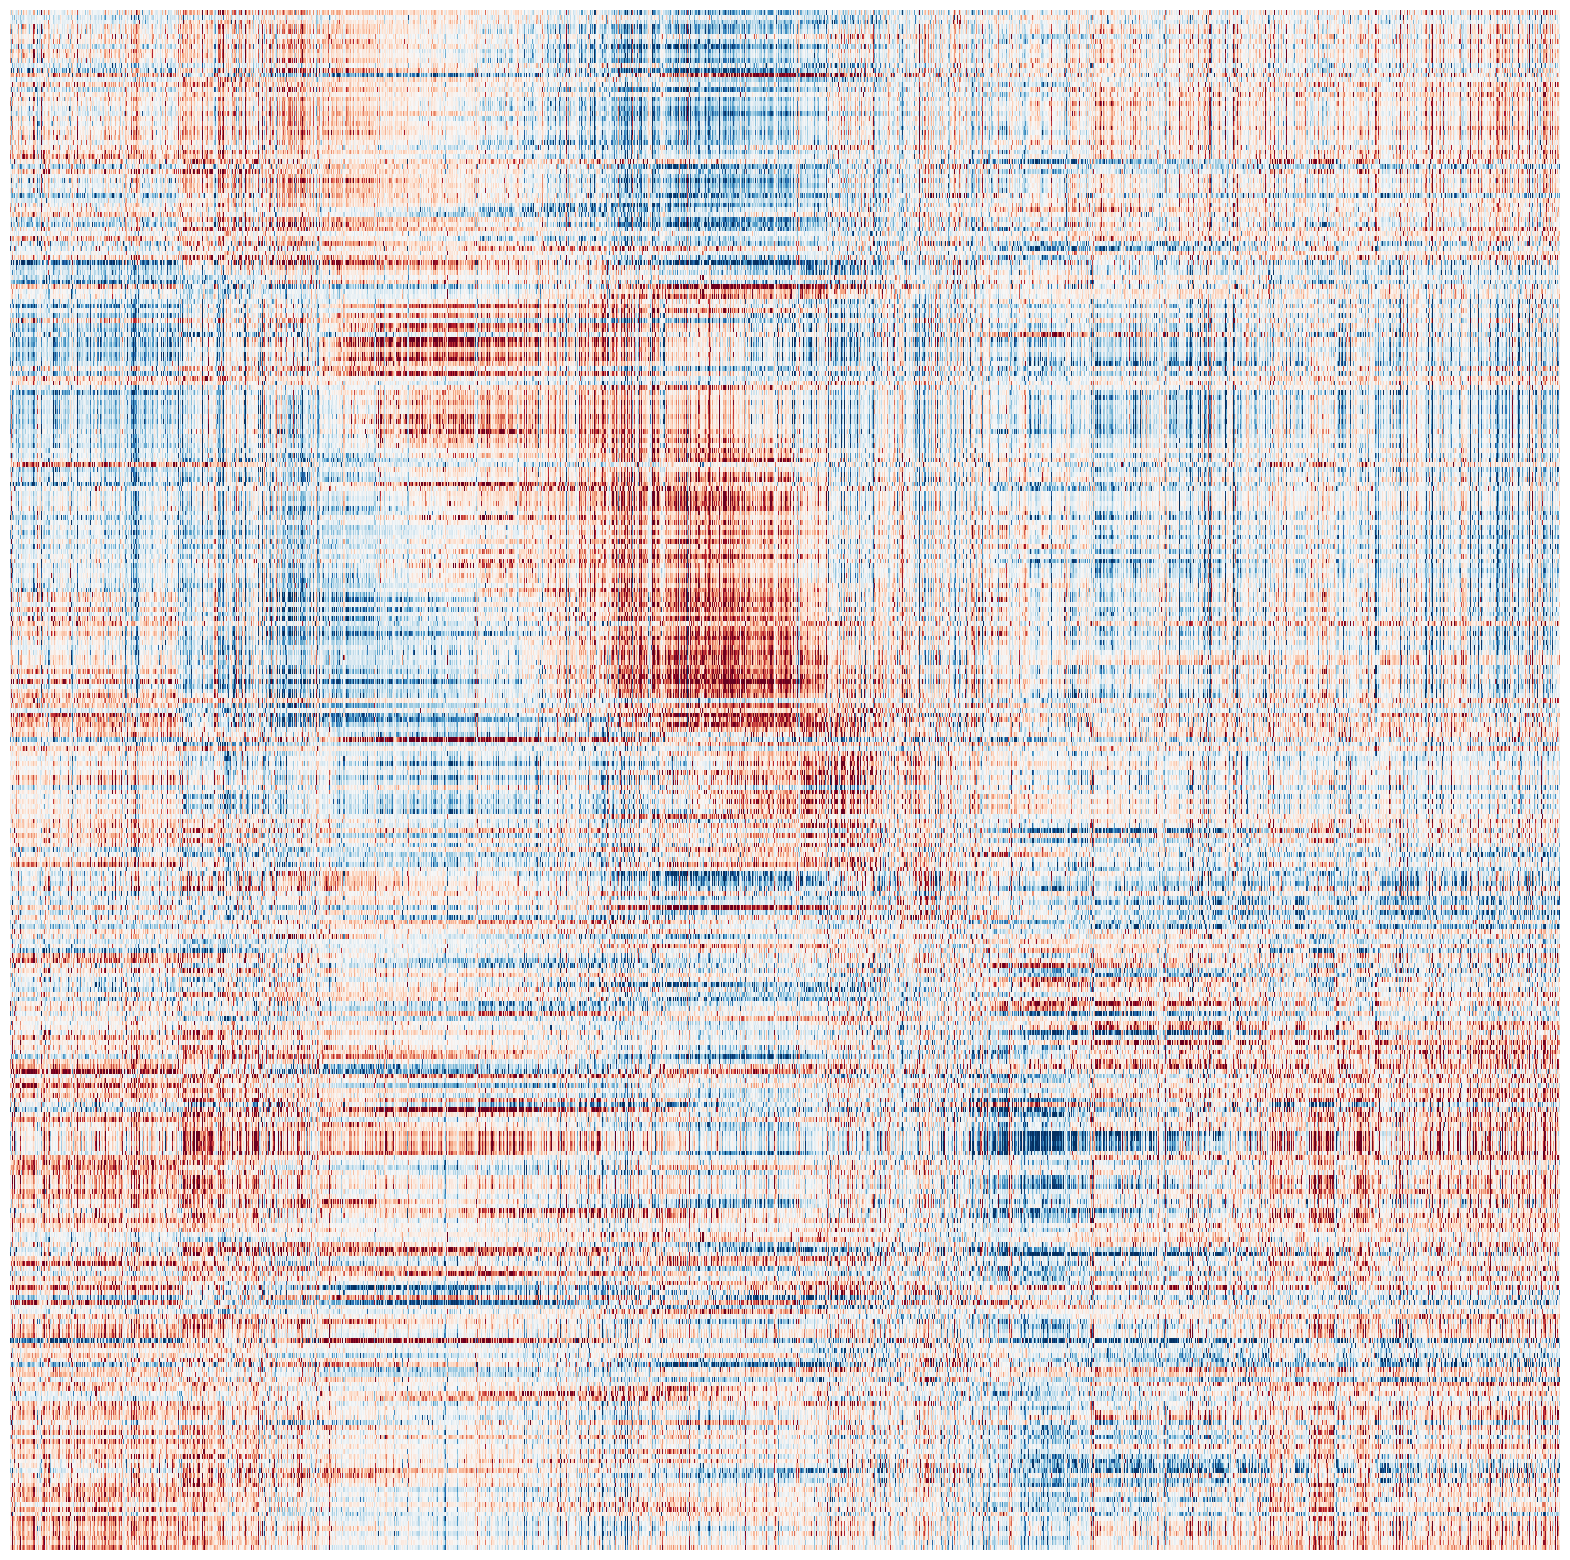

In [6]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_reordered, cmap='RdBu_r', center=0)
plt.xticks([])
plt.yticks([])
plt.gca().collections[0].colorbar.remove()
plt.savefig(save_path + 'granger_signed_heatmap_hvg.png', dpi=300, bbox_inches='tight')
plt.show()